# 1) Step by step process

**Function Implementation (Step-by-step)**


---



In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from math import log2
from sklearn import datasets
from sklearn.model_selection import train_test_split
from IPython.display import display
import pprint

In [ ]:
# Loading the iris dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Iris/Iris.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Dropping id col
df.drop(['Id'], axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Shuffle the dataset
df_shuffled = df.sample(frac=1)
df_shuffled.reset_index(drop=True, inplace=True)
df_shuffled.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,5.4,3.0,4.5,1.5,Iris-versicolor
2,6.3,2.8,5.1,1.5,Iris-virginica
3,6.1,3.0,4.6,1.4,Iris-versicolor
4,4.4,3.0,1.3,0.2,Iris-setosa
5,7.7,2.6,6.9,2.3,Iris-virginica
6,5.0,3.3,1.4,0.2,Iris-setosa
7,6.0,3.4,4.5,1.6,Iris-versicolor
8,5.8,2.7,4.1,1.0,Iris-versicolor
9,5.5,3.5,1.3,0.2,Iris-setosa


In [ ]:
# Splitting the dataset with 80/20 ratio
LENGTH = len(df)
TRAIN_SIZE = .8
df_train = df_shuffled[:int(LENGTH * TRAIN_SIZE)]
df_test = df_shuffled[int(LENGTH * TRAIN_SIZE):]
print("Train dataset: ")
print("Length : {}".format(len(df_train)))
display(df_train.head())
print("\nTest dataset: ")
print("Length : {}".format(len(df_test)))
display(df_test.head())

Train dataset: 
Length : 120


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.9,3.0,4.2,1.5,Iris-versicolor
1,5.4,3.0,4.5,1.5,Iris-versicolor
2,6.3,2.8,5.1,1.5,Iris-virginica
3,6.1,3.0,4.6,1.4,Iris-versicolor
4,4.4,3.0,1.3,0.2,Iris-setosa



Test dataset: 
Length : 30


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,5.9,3.2,4.8,1.8,Iris-versicolor
121,6.3,2.7,4.9,1.8,Iris-virginica
122,6.3,2.9,5.6,1.8,Iris-virginica
123,5.7,4.4,1.5,0.4,Iris-setosa
124,6.4,3.1,5.5,1.8,Iris-virginica


In [ ]:
# Counting the number of classes in the training dataset
df_train['Species'].value_counts()

Species
Iris-versicolor    42
Iris-setosa        42
Iris-virginica     36
Name: count, dtype: int64

In [ ]:
# Adding the prediction column as the 5th column to the testing dataset
df_test.insert(5, 'Prediction', ['?'] * len(df_test))
df_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
120,5.9,3.2,4.8,1.8,Iris-versicolor,?
121,6.3,2.7,4.9,1.8,Iris-virginica,?
122,6.3,2.9,5.6,1.8,Iris-virginica,?
123,5.7,4.4,1.5,0.4,Iris-setosa,?
124,6.4,3.1,5.5,1.8,Iris-virginica,?


Threshold experiment (for one attribute):
- Calculating Entropy
- Calculating SplitInfo
- Calculating InformationGain
- Calculating GainRatio

In [ ]:
def calculate_entropy(df, target_col):
  individual_class_count = df[target_col].value_counts().values
  total_class_count = len(df)
  p = individual_class_count/total_class_count
  return sum(-p * np.log2(p))

In [ ]:
def calculate_threshold(df):
  threshold_all = dict()
  # Loop except the last column (which is the class column)
  for col in df.columns[:-1]:
    threshold_attr = set()
    sorted_col = df[col].sort_values().reset_index(drop=True)
    for x in range(len(df) - 1):
      threshold = (sorted_col[x] + sorted_col[x+1])/2
      threshold_attr.add(threshold)
    threshold_all[col] = threshold_attr
  return threshold_all

In [ ]:
def decision_node(df, features_col, class_col):
  # Calculate the entropy of the entire set
  e_total = calculate_entropy(df, class_col)
  # Perform discritization to numerical features
  threshold = calculate_threshold(df)
  # Calculate the entropy of each attribute (for each threshold)
  e_attributes = dict()
  # Calculate the gain of each attribute compared to the entire entropy
  # ...
  # Calculate the SplitInfo of each attribute
  # ...
  # Calculate the GainRatio of each attribute
  # Return the attribute with that has the highest GainRatio

Calculate entropy for each attribute (experiment: PetalLengthCm)
- We left here: Finding the data structure to store entropy for each threshold of each attribute.

In [ ]:
temp = {
    "attr1":[[1, 1.5], [2, 3.5]],
    "attr2":[[2, 1.5], [3, 3.1]]
}

In [ ]:
def entropy_attribute(df, threshold, target_col):
  e_attr_all = dict()
  for key, value in threshold.items():
    for x in value:
      df_filtered = df[df[key] <= x]
      e_attr = calculate_entropy(df_filtered, target_col)
      e_attr_all

In [ ]:
print(len(df_train[df_train['PetalLengthCm'] <= 6.8]))
df_train[df_train['PetalLengthCm'] <= 6.8]

119


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.4,2.8,5.6,2.1,Iris-virginica
1,5.4,3.9,1.3,0.4,Iris-setosa
2,6.4,2.7,5.3,1.9,Iris-virginica
3,5.6,2.8,4.9,2.0,Iris-virginica
4,5.1,3.8,1.5,0.3,Iris-setosa
...,...,...,...,...,...
114,6.3,2.7,4.9,1.8,Iris-virginica
115,5.4,3.0,4.5,1.5,Iris-versicolor
116,5.2,3.5,1.5,0.2,Iris-setosa
118,6.1,3.0,4.9,1.8,Iris-virginica


Calculating threshold for each attribute & storing them in a data structure

In [ ]:
threshold_all = dict()
# Loop except the last column (which is the class column)
for col in df_train.columns[:-1]:
  threshold_attr = set()
  sorted_col = df_train[col].sort_values().reset_index(drop=True)
  for x in range(len(df_train) - 1):
    threshold = (sorted_col[x] + sorted_col[x+1])/2
    threshold_attr.add(threshold)
  threshold_all[col] = threshold_attr

In [ ]:
pprint.pprint(threshold_all)

{'PetalLengthCm': {1.05,
                   1.15,
                   1.25,
                   1.3,
                   1.35,
                   1.4,
                   1.45,
                   1.5,
                   1.55,
                   1.6,
                   1.65,
                   1.7,
                   1.7999999999999998,
                   2.45,
                   3.15,
                   3.3,
                   3.45,
                   3.6500000000000004,
                   3.75,
                   3.8499999999999996,
                   3.9,
                   3.95,
                   4.0,
                   4.05,
                   4.1,
                   4.15,
                   4.2,
                   4.25,
                   4.3,
                   4.35,
                   4.4,
                   4.45,
                   4.5,
                   4.55,
                   4.6,
                   4.65,
                   4.7,
                   4.75,
                   4.8,

In [ ]:
for key,value in threshold_all.items():
  print(key)
  for x in value:
    print(x)
  print("")

Calculating the total entropy

In [ ]:
individual_class_count = df_train['Species'].value_counts().values
total_class_count = len(df_train)
print(individual_class_count)
print(total_class_count)

[44 40 36]
120


In [ ]:
# Calculating total entropy
p = individual_class_count/total_class_count
e_total = sum(-p * np.log2(p))
e_total

1.5801454700463617

**Class Implementation (Automatic Result)**


---




In [ ]:
class C45Tree():
  def __init__(self):
    pass
  def fit(self):
    pass

# 2) Using libraries

In [ ]:
# Importing libraries
import pandas as pd
import math
from sklearn import datasets
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [ ]:
# Loading the iris dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/Iris/Iris.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Encoding test
le = LabelEncoder()
y_encoded = le.fit_transform(df['Species'])
print(y_encoded)
print(le.classes_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
features_col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_col = ['Species']
X = df[features_col]
le = LabelEncoder()
y = le.fit_transform(df[target_col])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy')
model = model.fit(X_train, y_train)

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.75\nentropy = 1.58\nsamples = 120\nvalue = [44, 40, 36]'),
 Text(0.4090909090909091, 0.75, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0, 0]'),
 Text(0.5909090909090909, 0.75, 'x[3] <= 1.75\nentropy = 0.998\nsamples = 76\nvalue = [0, 40, 36]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[2] <= 5.05\nentropy = 0.371\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.172\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.09090909090909091, 0.25, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.2727272727272727, 0.25, 'x[1] <= 2.75\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.18181818181818182, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.36363636363636365, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 6.05\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2

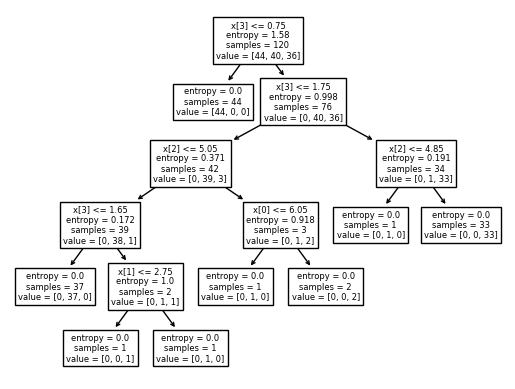

In [ ]:
tree.plot_tree(model)

Ref:
![Tree](https://www.researchgate.net/publication/340770863/figure/fig11/AS:960503341912081@1606013250923/The-tree-obtained-by-C45-on-Iris-data.png)
